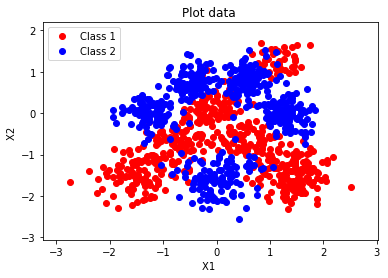

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DataPlot import *
from logisticCode import*
%matplotlib inline

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# Question c; visualize the dataset; 
plot_data(X, y)

In [2]:
# Question d; split the dataset into training and test sets
# Pre-processing data
X_train, y_train, X_test, y_test = splitData(X, y)


In [3]:
# Question e; define functions for training
logistic_train = Logistic(X_train, y_train)
weights, record = logistic_train.train(0.001, 100)

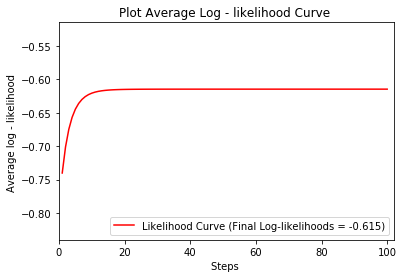

In [4]:
llTrain = logistic_train.logLikelihood(record)

plot_ll(llTrain)

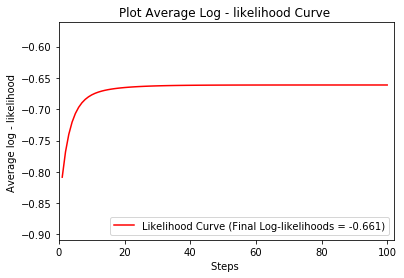

In [5]:
logistic_test = Logistic(X_test, y_test)
llTest = logistic_test.logLikelihood(record)
plot_ll(llTest)

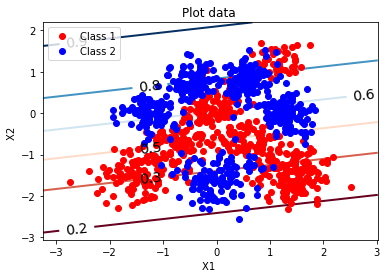

In [6]:
# a predict function

plot_predictive_distribution(X, y, sigmoid, weights)

In [7]:
print(confMatrix(X_test, y_test, weights, 0.5))

[[ 0.68867925  0.31132075]
 [ 0.31914894  0.68085106]]


In [8]:
# Question g: ROC curve

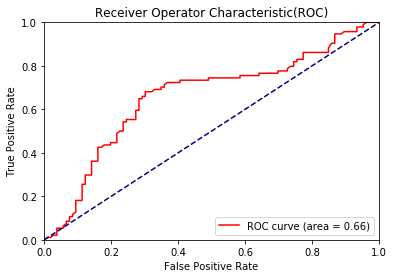

In [9]:
plot_ROC(X_test, y_test, weights)

In [10]:
# Question h; RBFs

In [11]:
def RBF_test(l, learnRate, iterations):
    X_RBF_train = expand_inputs(l, X_train, X_train)
    X_RBF_test = expand_inputs(l, X_test, X_train)

    lo_RBF_train = Logistic(X_RBF_train, y_train)
    weights, record = lo_RBF_train.train(learnRate, iterations)

    ll_RBF_train = lo_RBF_train.logLikelihood(record)
    plot_ll(ll_RBF_train)

    lo_RBF_test = Logistic(X_RBF_test, y_test)
    ll_RBF_test = lo_RBF_test.logLikelihood(record)
    plot_ll(ll_RBF_test)

    plot_predictive_distribution_expand(X, y, sigmoid, expand_inputs, l, X_train, weights)
    print(confMatrix(X_RBF_test, y_test, weights, 0.5))

    plot_ROC(X_RBF_test, y_test, weights)
    #return weights

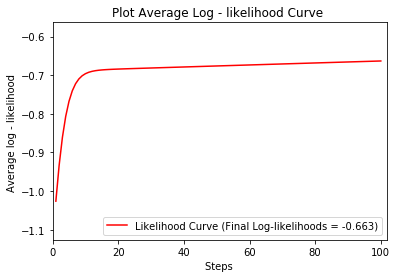

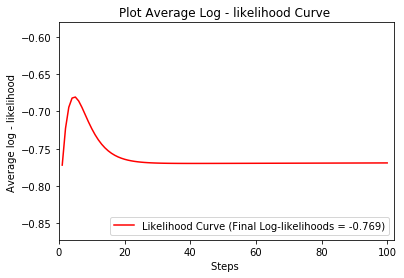

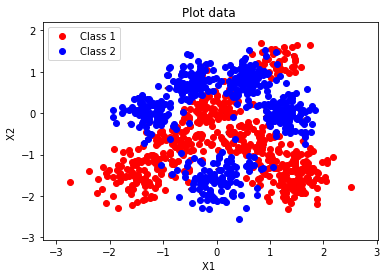

[[ 1.  0.]
 [ 1.  0.]]


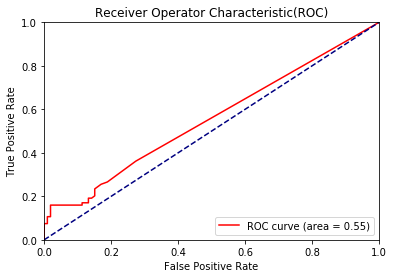

In [12]:
RBF_test(0.01, 0.001, 100)

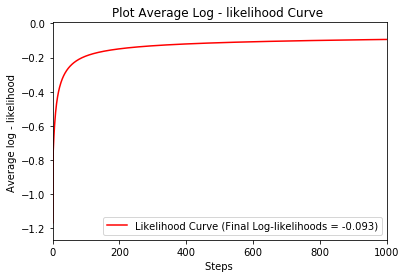

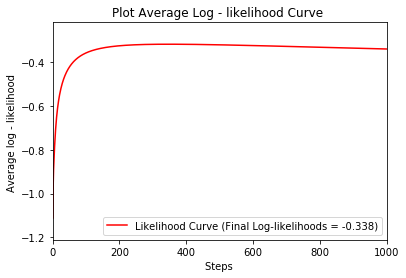

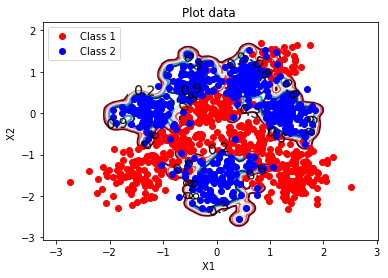

[[ 0.91509434  0.08490566]
 [ 0.13829787  0.86170213]]


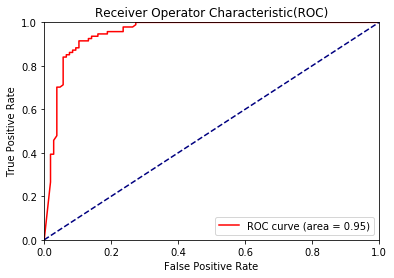

In [13]:
RBF_test(0.1, 0.01, 1000)

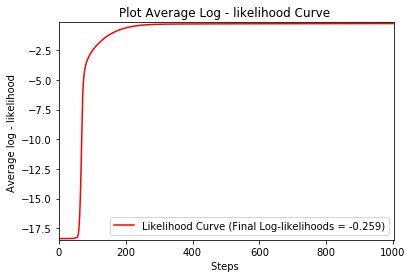

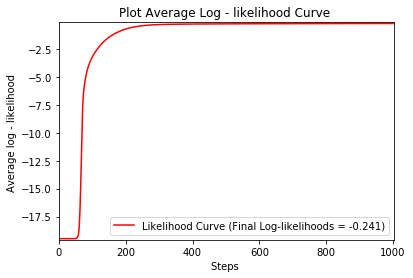

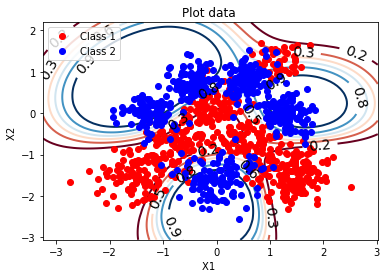

[[ 0.85849057  0.14150943]
 [ 0.04255319  0.95744681]]


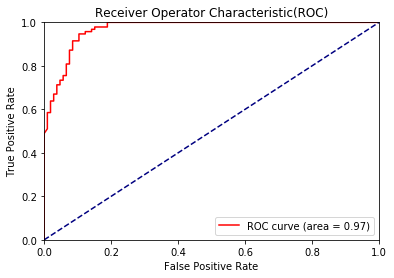

In [14]:
RBF_test(1, 0.0001, 1000)

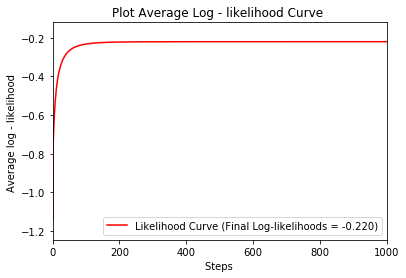

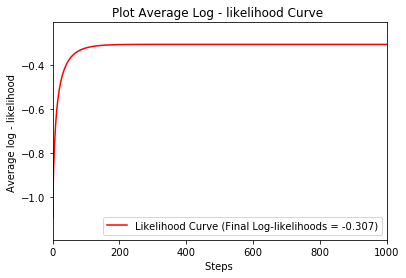

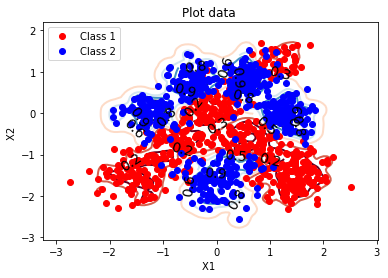

[[ 0.93396226  0.06603774]
 [ 0.07446809  0.92553191]]


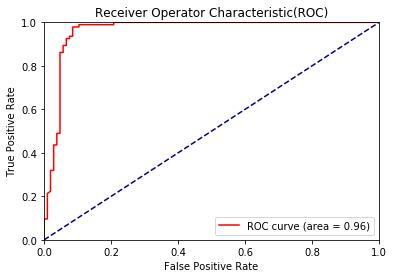

In [15]:
#question j     
def RBF_test_MAP(l, learnRate, iterations):
    X_RBF_train = expand_inputs(l, X_train, X_train)
    X_RBF_test = expand_inputs(l, X_test, X_train)

    lo_RBF_train = Logistic_MAP(X_RBF_train, y_train)
    weights, record = lo_RBF_train.train(learnRate, iterations)

    ll_RBF_train = lo_RBF_train.logLikelihood(record)
    plot_ll(ll_RBF_train)

    lo_RBF_test = Logistic_MAP(X_RBF_test, y_test)
    ll_RBF_test = lo_RBF_test.logLikelihood(record)
    plot_ll(ll_RBF_test)

    plot_predictive_distribution_expand(X, y, sigmoid, expand_inputs, l, X_train, weights)
    print(confMatrix(X_RBF_test, y_test, weights, 0.5))

    plot_ROC(X_RBF_test, y_test, weights)
    
    
RBF_test_MAP(0.1, 0.01, 1000)

In [3]:
import scipy
from scipy import optimize



X_opt_train = expand_inputs(0.1, X_train, X_train)
X_opt_test = expand_inputs(0.1, X_test, X_train)
y_opt_train = y_train.reshape(-1)
y_opt_test = y_test.reshape(-1)
w0 = np.ones((X_opt_train.shape[1]+1, 1))


beta_MAP = scipy.optimize.fmin_l_bfgs_b(func, w0, grad, args = (X_opt_train, y_opt_train))[0]
print(confMatrix(X_opt_test, y_opt_test, beta_MAP, 0.5))

[[ 0.93396226  0.06603774]
 [ 0.17021277  0.82978723]]


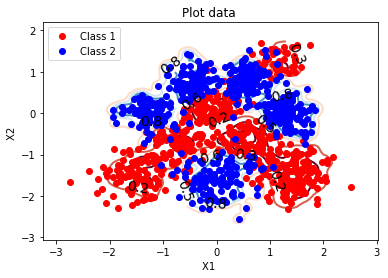

In [7]:
from numpy.linalg import inv
import math 

def laplace(X_test, X_train, y_train):
    wMAP = scipy.optimize.fmin_l_bfgs_b(func, w0, grad, args = (X_train, y_train))[0]
    X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
    X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
    s = sig(np.dot(X_train, wMAP))
    sa = np.eye(s.shape[0])* (s * (1 - s))
    Sn = np.eye(wMAP.shape[0]) + np.dot(np.dot(X_train.T, sa), X_train)
    L = np.linalg.cholesky(Sn)
    L_x = scipy.linalg.solve_triangular(L, X_test.T)
    va = np.diag(np.dot(L_x.T, L_x))
    ua = np.dot(X_test, wMAP)
    k = np.power((1 + math.pi * va / 8 ), -1/2)
    return 1 - sig(k * ua)


laplace(X_opt_test, X_opt_train, y_opt_train)

plot_predictive_distribution_laplace(X, y, laplace, expand_inputs, 0.1, X_train, y_opt_train)
